In [1]:
TCanvas *c1=new TCanvas("c3","c3",400,600);

In [2]:
TFile *udead=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid_3He/hit/hit_0.root");
TTree *tudead=(TTree*) udead->Get("tree");

TFile *udead2=new TFile("/data/d1/share/zhuhy/t2023geant4sim_solid_3He/hit/hit_0.root");
TTree *tudead2=(TTree*) udead2->Get("tree");

In [3]:
TH2F* h2f = new TH2F("h2f", "Histogram", 500, 0, 16, 500, 0, 50);

In [4]:
   Double_t tafangle,t0angle,tafde;
   tudead->SetBranchAddress("tafangle", &tafangle);
   tudead->SetBranchAddress("t0angle", &t0angle);
   tudead->SetBranchAddress("tafde", &tafde);
   Long64_t nentries05 = tudead->GetEntries();
   for (Long64_t jentry05=1; jentry05<nentries05;jentry05+=5) {
      tudead->GetEntry(jentry05);
      if(tafde<25)h2f->Fill(t0angle,tafangle);
   }

In [5]:
   Double_t t0anglel,nt0angle,t0d2e;
   tudead2->SetBranchAddress("t0anglel", &t0anglel);
   tudead2->SetBranchAddress("t0angle", &nt0angle);
   tudead2->SetBranchAddress("t0d2e", &t0d2e);
   Long64_t nentries052 = tudead2->GetEntries();
   for (Long64_t jentry052=1; jentry052<nentries052;jentry052+=1) {
      tudead2->GetEntry(jentry052);
      if(t0d2e>200)h2f->Fill(nt0angle,t0anglel);
   }

In [6]:
  string ssa,ssa2;
  int count_d_t_theta_theta_0=0,count_d_t_theta_theta_1=0;
  TGraph *lisea=new TGraph();
  TGraph *lisea_2=new TGraph();
  Double_t tthetac,ttheta;
  ifstream ina("/home/zhuhy/JNBook/Experiment2022/taf/check/angle/txt/thetatheta_B14He3_0.txt");

  if(ina.is_open()){
    getline(ina,ssa);
    count_d_t_theta_theta_0=0;
    while(!ina.eof())
    {
      ina>>tthetac>>ttheta;
      lisea->SetPoint(count_d_t_theta_theta_0++,tthetac,ttheta);
    }
  }
  ina.close();
key=0;
  ifstream ina2("/home/zhuhy/JNBook/Experiment2022/taf/check/angle/txt/thetatheta_B14He3_740.txt");
  if(ina2.is_open()){
    getline(ina2,ssa2);
    count_d_t_theta_theta_1=0;
    while(!ina2.eof())
    {
      key++;
      ina2>>tthetac>>ttheta;
      if(key%20==0)lisea_2->SetPoint(count_d_t_theta_theta_1++,tthetac,ttheta);
    }
  }
  ina2.close();



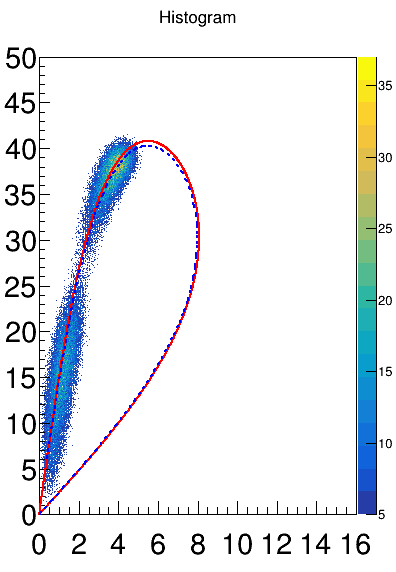

In [7]:
c1->Clear();
h2f->GetXaxis()->SetLabelSize(0.08);  // 放大X轴数字字体
h2f->GetYaxis()->SetLabelSize(0.08);  // 可选：同时放大Y轴字体
gStyle->SetOptStat(0);
h2f->SetMinimum(5);
h2f->Draw("colz");

lisea->SetLineStyle(1);
lisea_2->SetLineStyle(2);
lisea->SetLineWidth(2);
lisea_2->SetLineWidth(2);
lisea->SetLineColor(2);
lisea_2->SetLineColor(4);


  lisea->SetMarkerStyle(6);
  lisea->SetMarkerColor(2);
  lisea->Draw("C same");
  lisea_2->SetMarkerStyle(6);
  lisea_2->SetMarkerColor(6);
  lisea_2->Draw("C same");

c1->Draw();